In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/BE(CSE)/Mega Project!/Dataset/ATLAS Collaboration CERN Dataset.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,5,19,21,27,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Importing Dependencies

import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer, StandardScaler

from time import time

%matplotlib inline

In [4]:
# Read data from the CSV into a dataframe

#loc = "G:/Z - Priority/Z - Mega Project/Python Code and Dataset/"
#df = pd.read_csv(loc + 'ATLAS Collaboration CERN Dataset.csv')

# Display first 5 rows
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.47,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999,-999.00,-999,46.226,2.233584,b
2,100002,-999,162.172,125.953,35.635,-999,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999,-999.00,-999,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999,-999.00,-999,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999,-999.00,-999,0.000,6.245333,b


In [5]:
#Train set

train = df[:250000]

train.tail()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
249995,349995,-999,71.989,36.548,5.042,-999,-999.0,-999.0,1.392,5.042,...,0,-999.000,-999.0,-999.000,-999,-999.0,-999,0.000,4.505083,b
249996,349996,-999,58.179,68.083,22.439,-999,-999.0,-999.0,2.585,22.439,...,0,-999.000,-999.0,-999.000,-999,-999.0,-999,0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999,-999.0,-999.0,2.390,22.183,...,1,41.992,1.8,-0.166,-999,-999.0,-999,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999,-999.0,-999.0,3.365,13.504,...,0,-999.000,-999.0,-999.000,-999,-999.0,-999,0.000,1.681611,b
249999,349999,-999,72.756,70.831,7.479,-999,-999.0,-999.0,2.025,7.479,...,0,-999.000,-999.0,-999.000,-999,-999.0,-999,0.000,1.877474,b


In [6]:
#Test set

test = df[250000:]
test = test.drop(['Weight', 'Label'], axis = 1)

test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
250000,350000,-999,79.589,23.916,3.036,-999,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999,-999.000,-999,0.000
250001,350001,106.398,67.490,87.949,49.994,-999,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999,-999.000,-999,47.575
250002,350002,117.794,56.226,96.358,4.137,-999,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999,-999.000,-999,0.000
250003,350003,135.861,30.604,97.288,9.104,-999,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999,-999.000,-999,0.000
250004,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [7]:
#Checking the Missing Values in the train set & test set

cnt1 = train.isnull().sum().sum()
cnt2 = test.isnull().sum().sum()

print(cnt1+cnt2)

0


In [0]:
X = train.drop(['EventId','Label','Weight'],1)
y = train['Label']

In [9]:
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.47,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999,-999.00,-999,46.226
2,-999,162.172,125.953,35.635,-999,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999,-999.00,-999,44.251
3,143.905,81.417,80.943,0.414,-999,-999.000,-999.000,3.310,0.414,75.968,...,0.06,86.062,0,-999.000,-999.000,-999.000,-999,-999.00,-999,0.000
4,175.864,16.915,134.805,16.405,-999,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999,-999.00,-999,0.000


In [10]:
#Filling in -999.00(Marker for empty feilds) values with median of the rest of the data in the column

imp = Imputer(missing_values=-999.00, strategy='median')
cols = X.columns
X = pd.DataFrame(imp.fit_transform(X), columns=cols)
X.describe()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,57.895962,2.193104,268.220619,-0.411629,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,50.739149,-0.010535,-0.001879,73.064591
std,52.859218,35.344886,40.828691,63.655682,0.948104,224.229668,1.948520,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,17.792135,1.094446,0.978743,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,95.665000,19.241000,59.388750,14.068750,2.107000,225.885000,-0.244000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,47.902000,-0.010000,-0.002000,0.000000
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,2.107000,225.885000,-0.244000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,47.902000,-0.010000,-0.002000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [11]:
#Some features still have a high deviation. Hence scaling all the features

scaler = StandardScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns=cols)
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,...,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05
mean,2.233860e-16,1.026379e-16,5.090151e-18,9.707746e-17,-3.885194e-16,8.123795e-16,4.937327e-15,-7.404088e-16,-4.464491e-16,-9.566836e-17,...,-2.770095e-17,-4.272862e-16,-6.810552e-16,-2.729950e-17,2.399909e-15,9.019176e-16,-2.429878e-15,1.360658e-15,1.684997e-15,3.729514e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.106986e+00,-1.393127e+00,-1.833346e+00,-9.095194e-01,-2.313151e+00,-1.135528e+00,-9.060418e+00,-2.765453e+00,-8.493221e-01,-9.708082e-01,...,-1.728202e+00,-1.550358e+00,-1.001792e+00,-9.829904e-01,-3.252356e+00,-2.221488e+00,-1.165638e+00,-4.102050e+00,-3.208328e+00,-7.454394e-01
25%,-4.682718e-01,-8.487474e-01,-5.337736e-01,-6.885057e-01,-9.081739e-02,-1.888051e-01,8.602902e-02,-7.192400e-01,-7.217711e-01,-6.990329e-01,...,-8.635164e-01,-6.860094e-01,-1.001792e+00,-4.106268e-01,-3.117335e-01,-3.810253e-01,-1.594612e-01,4.892383e-04,-1.238408e-04,-7.454394e-01
50%,-1.515620e-01,-7.683784e-02,-1.819798e-01,-3.052124e-01,-9.081739e-02,-1.888051e-01,8.602902e-02,1.512310e-01,-2.963992e-01,-3.264114e-01,...,-7.659564e-03,-2.376155e-01,2.130497e-02,-2.412059e-01,1.421777e-03,-8.804812e-03,-1.594612e-01,4.892383e-04,-1.238408e-04,-3.321118e-01
75%,1.927542e-01,6.891585e-01,2.713053e-01,3.341898e-01,-9.081739e-02,-1.888051e-01,8.602902e-02,7.509171e-01,3.894173e-01,3.633872e-01,...,8.669588e-01,4.235762e-01,1.044402e+00,-3.703323e-02,3.145771e-01,3.726678e-01,-1.594612e-01,4.892383e-04,-1.238408e-04,3.761565e-01
max,2.027292e+01,1.813095e+01,3.106079e+01,4.362703e+01,6.655289e+00,2.099083e+01,8.776745e+00,4.228969e+00,1.264322e+02,1.464083e+01,...,1.739370e+00,1.418332e+01,2.067499e+00,2.176581e+01,3.255199e+00,2.250139e+00,3.769746e+01,4.121303e+00,3.212167e+00,1.591961e+01


# Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Percentage of 's' :  34.266799999999996


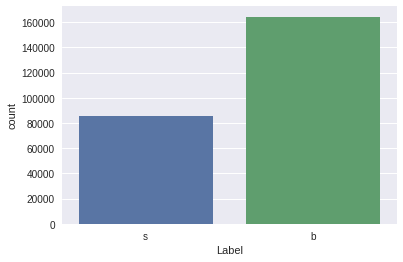

In [12]:
#Count Plot

#y = train['Label']
sns.countplot(y)
print("Percentage of 's' : ",float((sum(y=='s'))/len(y))*100)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


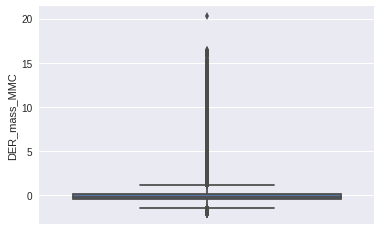

In [13]:
sns.boxplot(y = X['DER_mass_MMC'])

# Validation

In [0]:
# Shuffle and split the dataset into training and testing set.

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 42,
                                                    stratify = y)

#Model Building and Prediction

In [0]:
#!pip install tensorflow-gpu

In [16]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [17]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found!')
print('Found GPU at: {}'.format(device_name))  

Found GPU at: /device:GPU:0


In [18]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() #Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [0]:
classifier.compile(optimizer = 'nadam', loss = 'binary_crossentropy')

In [0]:
def categ(string):
    if string == 'b':
        return 0
    else:
        return 1
    
y_train = y_train.apply(categ)
y_test = y_test.apply(categ)

In [21]:
y_train.head()

93497     0
97173     1
53513     1
108664    0
221861    0
Name: Label, dtype: int64

In [22]:
y_test.head()

7705      0
33409     0
55769     0
112838    0
229388    0
Name: Label, dtype: int64

In [23]:
classifier.fit(X_train, y_train, batch_size = 256, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
200000/200000 [==============================] - 5s 27us/step - loss: 0.4275
Epoch 2/20
200000/200000 [==============================] - 4s 21us/step - loss: 0.3777
Epoch 3/20
200000/200000 [==============================] - 4s 22us/step - loss: 0.3711
Epoch 4/20
200000/200000 [==============================] - 4s 21us/step - loss: 0.3683
Epoch 5/20
200000/200000 [==============================] - 4s 22us/step - loss: 0.3664
Epoch 6/20
200000/200000 [==============================] - 4s 22us/step - loss: 0.3652
Epoch 7/20
200000/200000 [==============================] - 4s 22us/step - loss: 0.3642
Epoch 8/20
200000/200000 [==============================] - 4s 22us/step - loss: 0.3634
Epoch 9/20
200000/200000 [==============================] - 4s 21us/step - loss: 0.3628
Epoch 10/20
200000/200000 [==============================] - 4s 22us/step - loss: 0.3623
Epoch 11/20
200000/200000 [==============================] - 4s 22us/st

In [0]:
start = time()

y_pred = classifier.predict(X_train)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred]

end = time()
tr_time = end - start

In [0]:
start = time()

y_pred_2 = classifier.predict(X_test)
y_pred_2 = [ 1 if y>=0.5 else 0 for y in y_pred_2]

end = time()
ts_time = end - start

In [0]:
#Import f1_score and accuracy_score from sklearn.metrics

from sklearn.metrics import f1_score, accuracy_score

In [27]:
train_f1_scr = f1_score(y_train , y_pred, pos_label =1)
train_acc = accuracy_score(y_train , y_pred)

print ("Made predictions in {:.4f} seconds.".format(tr_time))
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(train_f1_scr , train_acc))

Made predictions in 5.0532 seconds.
F1 score and accuracy score for training set: 0.7593 , 0.8403.


In [28]:
test_f1_scr = f1_score(y_test, y_pred_2, pos_label =1)
test_acc = accuracy_score(y_test , y_pred_2)

print ("Made predictions in {:.4f} seconds.".format(ts_time))
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(test_f1_scr , test_acc))

Made predictions in 1.3304 seconds.
F1 score and accuracy score for test set: 0.7525 , 0.8364.


In [0]:
#import matplotlib.pyplot as plt

def gplot(c1,c2):
    # Data to plot
    labels = 'Signal', 'Background'
    sizes = [c1, c2]
    colors = ['gold', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 
    plt.axis('equal')
    plt.show()

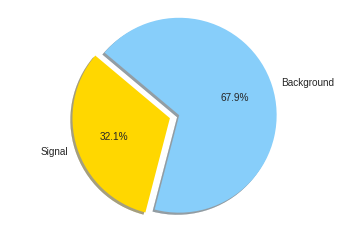

In [30]:
c1 = 0
c2 = 0

for i in range(0,len(y_pred)):
        if(y_pred[i] == 1):
            c1 = c1 + 1
        else:
            c2 = c2 + 1
gplot(c1,c2)

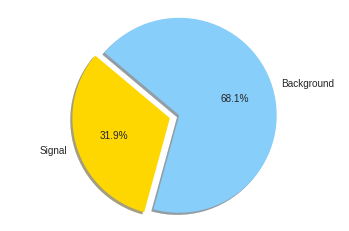

In [31]:
c1 = 0
c2 = 0

for i in range(0,len(y_pred_2)):
        if(y_pred_2[i] == 1):
            c1 = c1 + 1
        else:
            c2 = c2 + 1
gplot(c1,c2)